In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import matplotlib.dates
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
  # считываем данные, обрабатываем их
df = pd.read_csv('oil.csv', sep=';', encoding='latin-1', parse_dates=True)
print(df.head())
df = df.dropna()
df.info()

         date  dcoilwtico
0  01.01.2013         NaN
1  02.01.2013       93.14
2  03.01.2013       92.97
3  04.01.2013       93.12
4  07.01.2013       93.20
<class 'pandas.core.frame.DataFrame'>
Index: 1055 entries, 1 to 1093
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1055 non-null   object 
 1   dcoilwtico  1055 non-null   float64
dtypes: float64(1), object(1)
memory usage: 24.7+ KB


In [3]:
 df['dcoilwtico'] = pd.to_numeric(df['dcoilwtico'], errors='coerce')
 df['dcoilwtico']

,dcoilwtico
1,93.14
2,92.97
3,93.12
4,93.20
5,93.21
...,...
1089,53.19
1090,52.68
1091,49.83
1092,48.75


In [4]:
df_mean = df['dcoilwtico'].mean()
def test_apply(x):
    try:
        return float(x)
    except ValueError:
        return float(df_mean)

df['dcoilwtico'] = df['dcoilwtico'].apply(test_apply)

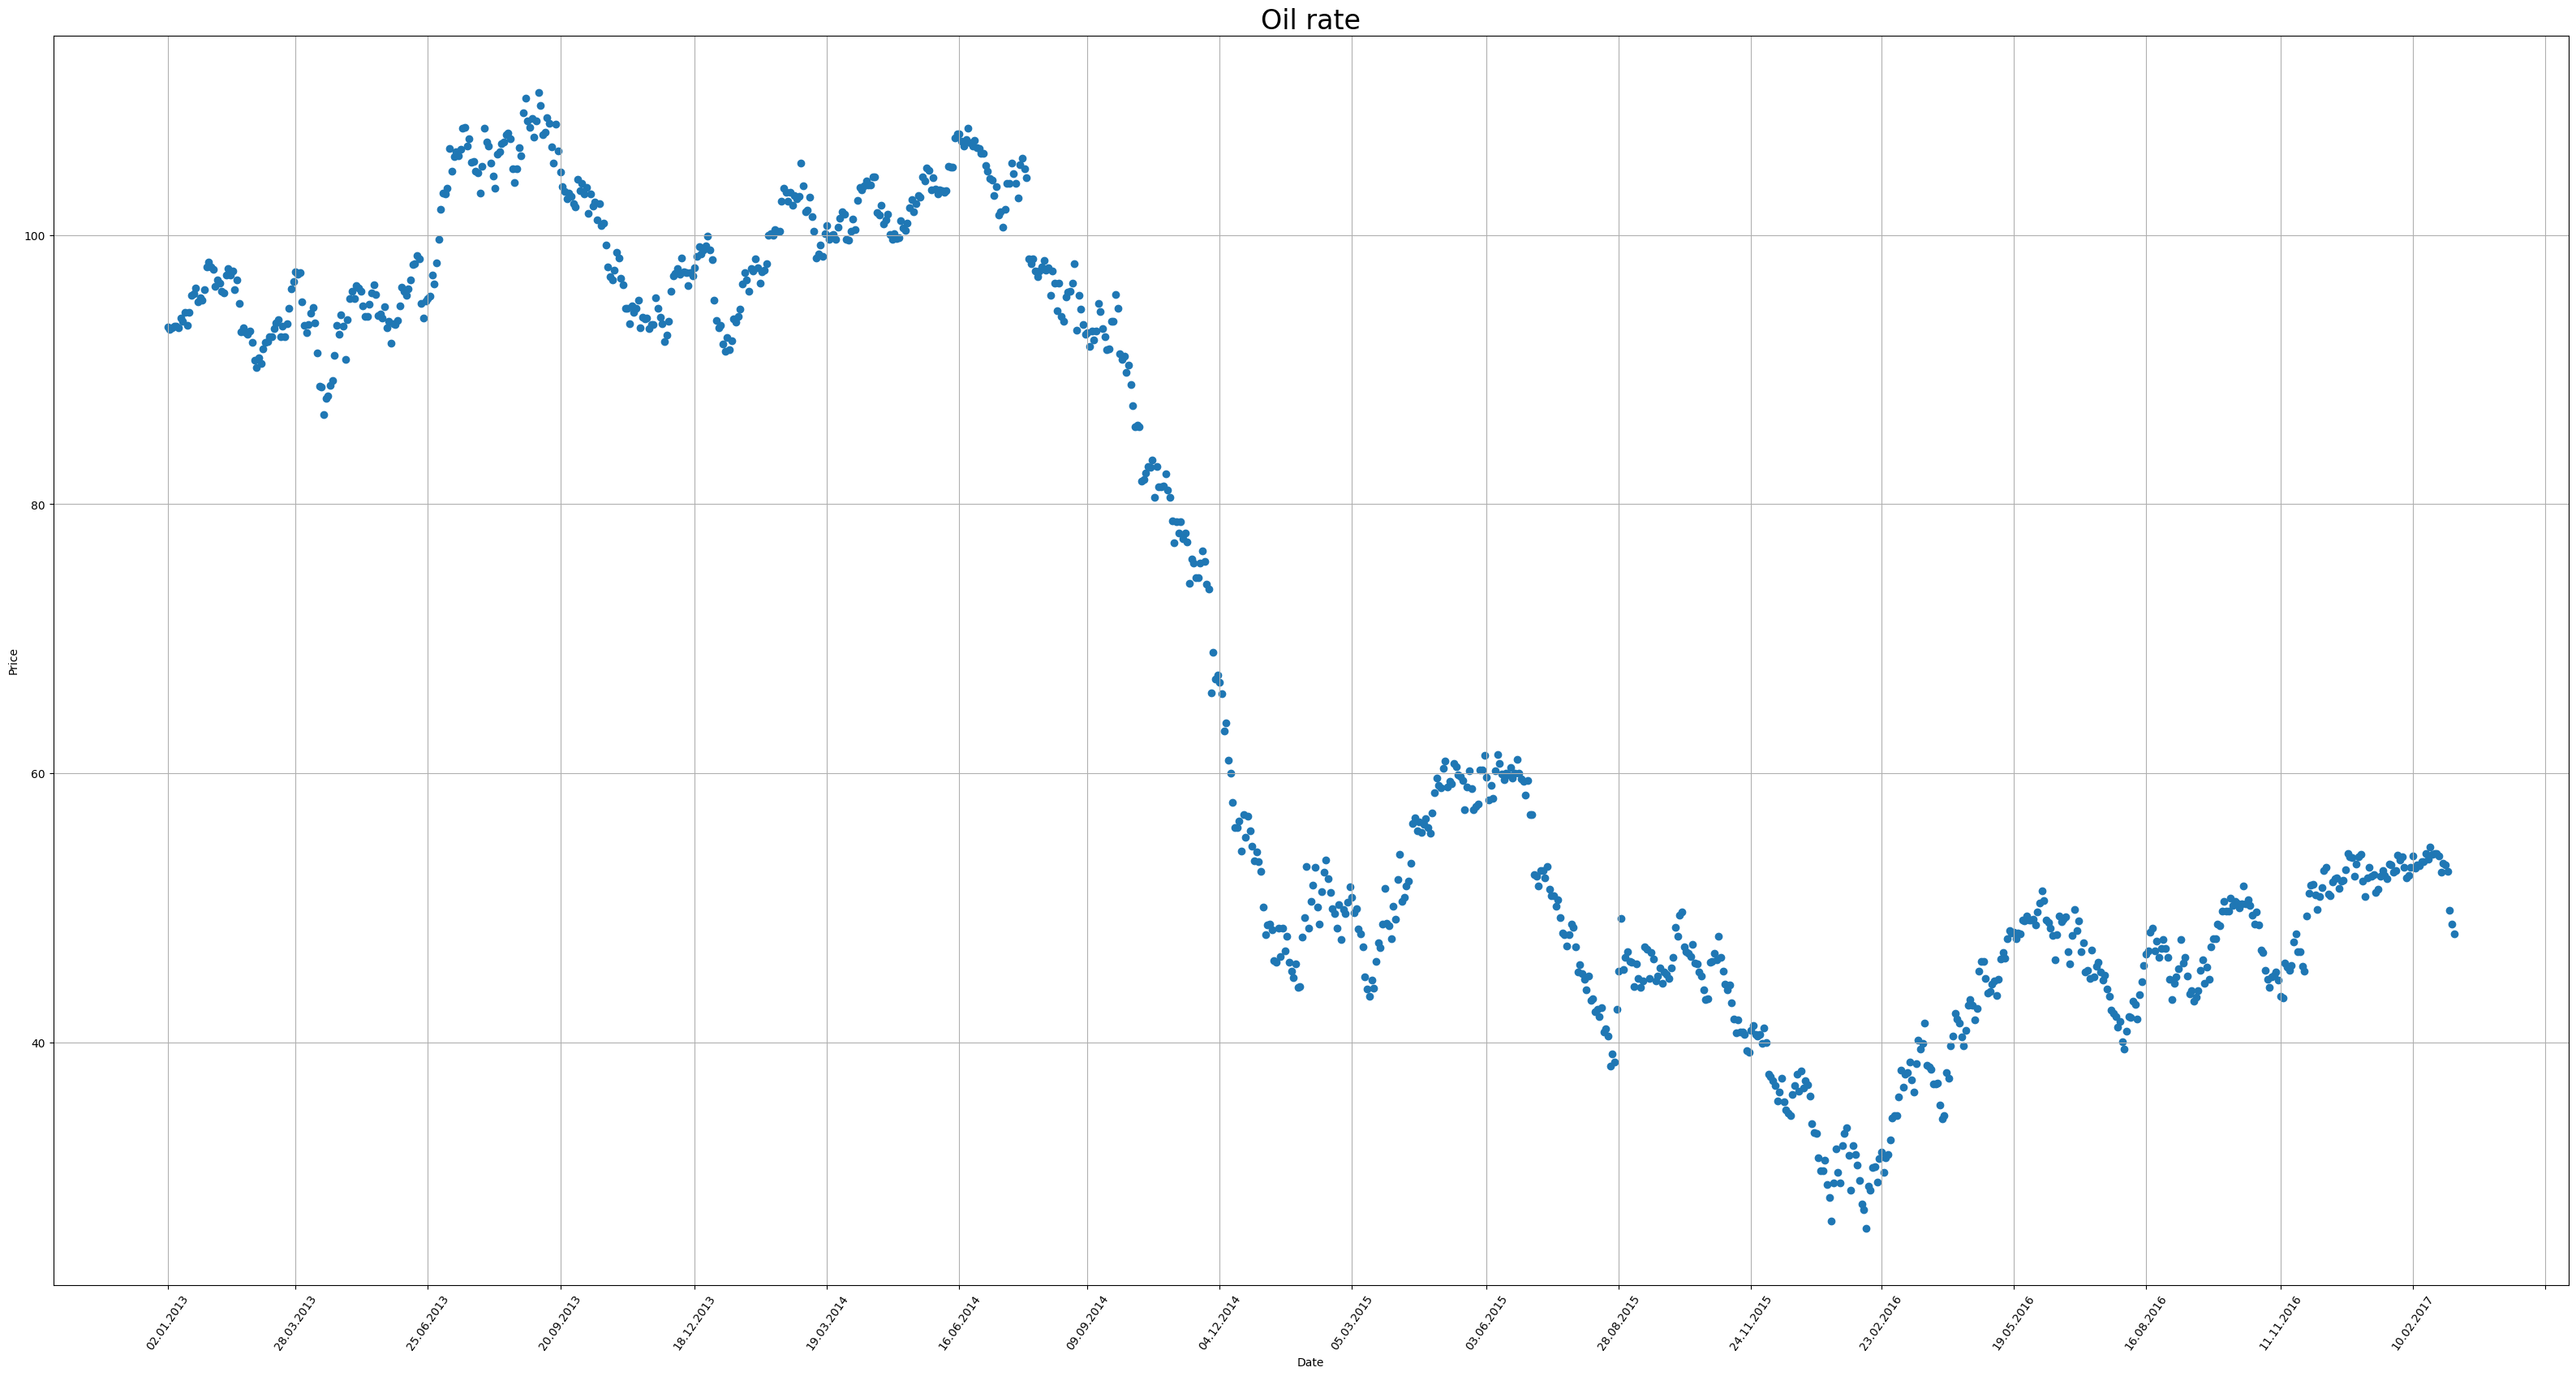

In [5]:
  # рисуем график
fig = plt.figure(figsize=(40, 20))  # размер графика
axes = fig.add_subplot(1, 1, 1)  # создаем оси и настраиваем их
axes.tick_params(axis='x', labelrotation=55)
locator = matplotlib.dates.AutoDateLocator(minticks=10, maxticks=30)
axes.xaxis.set_major_locator(locator)


plt.rc('font', size = 20)  # размер шрифта


plt.scatter(x=df['date'], y=df['dcoilwtico'])  # заполняем график
plt.title('Oil rate')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

In [6]:
for i in range(1, 8):
    df[f"lag_{i}"] = df['dcoilwtico'].shift(i)

In [7]:
df.dropna(inplace=True)

In [8]:
df_test = pd.read_csv('test_oil.csv', sep=';', encoding='latin-1')
print(df_test.head())
df_test = df_test.dropna()
df_test.rename(columns={'ï»¿13.03.2017': 'date', '47.95': 'dcoilwtico'}, inplace=True)
df_mean2 = df_test['dcoilwtico'].mean()
def test_apply(x):
    try:
        return float(x)
    except ValueError:
        return float(df_mean2)

df_test['dcoilwtico'] = df_test['dcoilwtico'].apply(test_apply)
for i in range(1, 8):
    df_test[f"lag_{i}"] = df_test['dcoilwtico'].shift(i)
df_test.dropna(inplace=True)

  ï»¿13.03.2017  47.95
0    14.03.2017  47.24
1    15.03.2017  48.34
2    16.03.2017  48.30
3    17.03.2017  48.34
4    20.03.2017  47.79


In [9]:
df.set_index(['date'], inplace = True)
df_test.set_index(['date'], inplace = True)
X_train = df.drop('dcoilwtico', axis=1)
y_train = df['dcoilwtico']
X_test = df_test.drop('dcoilwtico', axis=1)
y_test = df_test['dcoilwtico']

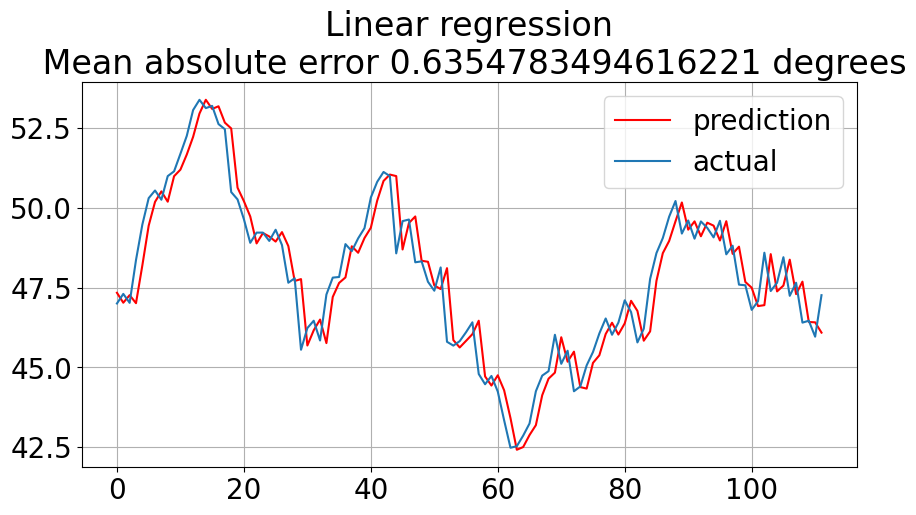

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(preds, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute error {mean_absolute_error(preds, y_test)} degrees");